In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
train_path = "input/train"
test_path = "input/test"
inputs = (50, 50, 3)

## feedforward network
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=inputs))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50, 50, 32)        128       
_________________________________________________________________
flatten_1 (Flatten)          (None, 80000)             0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 80000)             320000    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1280016   
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
batch_normalization_2

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255,)

# Change the batchsize according to your system RAM
train_batchsize = 32
val_batchsize = 32

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(50, 50),
    batch_size=train_batchsize,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    test_path,
    target_size=(50, 50),
    batch_size=val_batchsize,
    class_mode='categorical',
    shuffle=False
)

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['acc'])

# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=1)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
10/10 [==============================] - 2s 184ms/step - loss: 0.7973 - acc: 0.4500 - val_loss: 0.5623 - val_acc: 0.8333
Epoch 2/10
10/10 [==============================] - 0s 45ms/step - loss: 0.6826 - acc: 0.6000 - val_loss: 0.5224 - val_acc: 0.8333
Epoch 3/10
10/10 [==============================] - 1s 58ms/step - loss: 0.6560 - acc: 0.6500 - val_loss: 0.4837 - val_acc: 0.8333
Epoch 4/10
10/10 [==============================] - 0s 49ms/step - loss: 0.6475 - acc: 0.6333 - val_loss: 0.4670 - val_acc: 0.8333
Epoch 5/10
10/10 [==============================] - 0s 46ms/step - loss: 0.6922 - acc: 0.5833 - val_loss: 0.4860 - val_acc: 0.8333
Epoch 6/10
10/10 [==============================] - 0s 47ms/step - loss: 0.5697 - acc: 0.7833 - val_loss: 0.4933 - val_acc: 0.8333
Epoch 7/10
10/10 [==============================] - 1s 54ms/step - loss: 0.6092 - acc: 

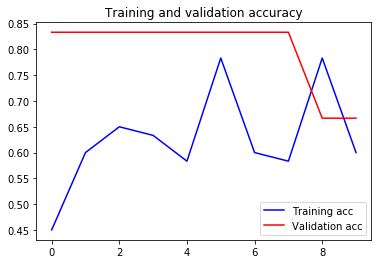

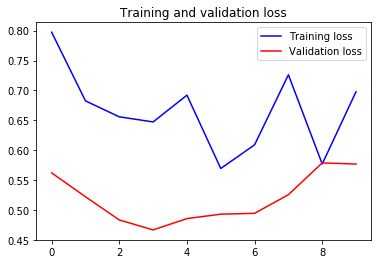

In [4]:
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('ff_acccuracy.png')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('ff_loss.png')

plt.show()